In [16]:
import sys
import os
sys.path.append(os.path.dirname(os.getcwd()))
from src import load_dataset, build_model
import matplotlib.pyplot as plt

In [17]:
train_data, val_data = load_dataset()

Path to dataset files: /Users/myeoh/.cache/kagglehub/datasets/jonathanoheix/face-expression-recognition-dataset/versions/1


In [18]:
import torch
import torch.nn as nn
import torch.optim as optim

# ----------------------------------------------------------------------
# Code adapted from PyTorch CIFAR-10 tutorial: 
# https://pytorch.org/tutorials/downloads/cifar10_tutorial.py
# ----------------------------------------------------------------------
net = build_model()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# helper function
def calculate_accuracy(data_loader, net):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in data_loader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100 * correct / total

train_loss = []
train_accuracy = []
test_accuracy = []

for epoch in range(20):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_data, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

    epoch_loss = running_loss / len(train_data)
    train_loss.append(epoch_loss)
    
    train_acc = calculate_accuracy(train_data, net)
    train_accuracy.append(train_acc)
    print(f'Accuracy on training set: {train_acc:.2f} %')

    test_acc = calculate_accuracy(val_data, net)
    test_accuracy.append(test_acc)
    print(f'Accuracy on test set: {test_acc:.2f} %')

print('Finished Training')

# Save model
project_root = os.path.dirname(os.getcwd())
os.makedirs(os.path.join(project_root, "models"), exist_ok=True)
save_path = os.path.join(project_root, "models", "emotion_net.pth")
torch.save(net.state_dict(), save_path)
print(f"Saved model to {save_path}")

[1,  2000] loss: 1.808
[1,  4000] loss: 1.697
[1,  6000] loss: 1.601
Accuracy on training set: 42.10 %
Accuracy on test set: 41.40 %
[2,  2000] loss: 1.510
[2,  4000] loss: 1.455
[2,  6000] loss: 1.430
Accuracy on training set: 48.74 %
Accuracy on test set: 47.28 %
[3,  2000] loss: 1.352
[3,  4000] loss: 1.336
[3,  6000] loss: 1.309
Accuracy on training set: 53.23 %
Accuracy on test set: 49.75 %
[4,  2000] loss: 1.242
[4,  4000] loss: 1.231
[4,  6000] loss: 1.262
Accuracy on training set: 56.40 %
Accuracy on test set: 50.51 %
[5,  2000] loss: 1.140
[5,  4000] loss: 1.170
[5,  6000] loss: 1.155
Accuracy on training set: 60.86 %
Accuracy on test set: 52.34 %
[6,  2000] loss: 1.044
[6,  4000] loss: 1.085
[6,  6000] loss: 1.073
Accuracy on training set: 65.88 %
Accuracy on test set: 52.50 %
[7,  2000] loss: 0.945
[7,  4000] loss: 0.969
[7,  6000] loss: 1.021
Accuracy on training set: 69.33 %
Accuracy on test set: 51.54 %
[8,  2000] loss: 0.845
[8,  4000] loss: 0.888
[8,  6000] loss: 0.932


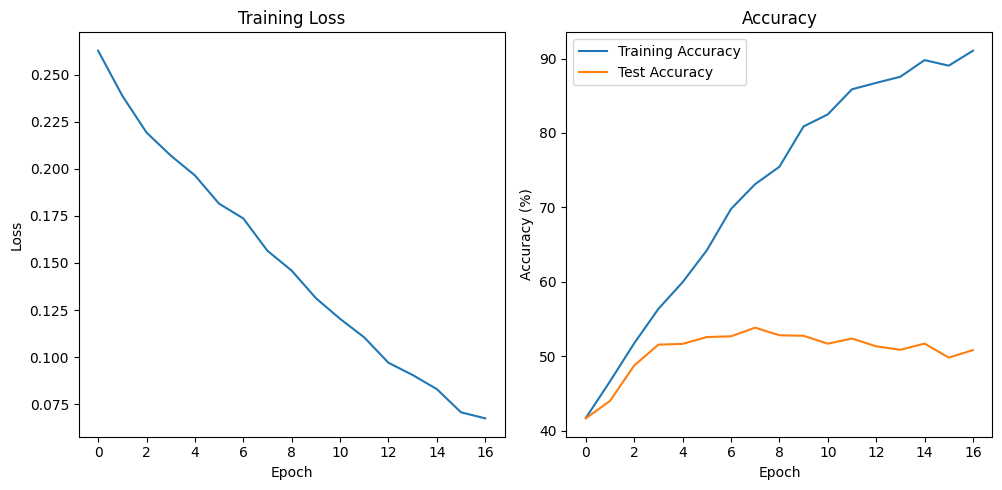

In [13]:
# Plot training curves
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(train_loss)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1, 3, 2)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(test_accuracy, label='Test Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.tight_layout()
plt.show()